In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
# Set default options
pd.options.display.width = 0
pd.options.display.max_rows=300

In [55]:
# Read the dataframe
df = pd.read_csv('dataset/house-data.csv')
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.shape

(1460, 81)

In [6]:
# Check for null values
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Data Clean up

### 1. Impute missing data

In [7]:
''' Total number of records are 1460 and the below columns are having most of the null values.
 - Alley : 1369
 - PoolQC : 1453
 - Fence : 1179
 - MiscFeature : 1406
 
 So, we can remove these features.
 
 The below features have some null values. Need to replace them
 
 - LotFrontage       259
 - MasVnrType          8
 - MasVnrArea          8
 - BsmtQual           37
 - BsmtCond           37
 - BsmtExposure       38
 - BsmtFinType1       37
 - BsmtFinType2       38
 - Electrical          1
 - FireplaceQu       690
 - GarageType         81
 - GarageYrBlt        81
 - GarageFinish       81
 - GarageQual         81
 - GarageCond         81
 
'''


' Total number of records are 1460 and the below columns are having most of the null values.\n - Alley : 1369\n - PoolQC : 1453\n - Fence : 1179\n - MiscFeature : 1406\n \n So, we can remove these features.\n \n The below features have some null values. Need to replace them\n \n - LotFrontage       259\n - MasVnrType          8\n - MasVnrArea          8\n - BsmtQual           37\n - BsmtCond           37\n - BsmtExposure       38\n - BsmtFinType1       37\n - BsmtFinType2       38\n - Electrical          1\n - FireplaceQu       690\n - GarageType         81\n - GarageYrBlt        81\n - GarageFinish       81\n - GarageQual         81\n - GarageCond         81\n \n'

In [8]:
df.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

In [9]:
df.shape

(1460, 77)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
## Fill null values for the applicable features as per the below rule:
#  a. For Categorical features, replace null values with the MODE of the feature (maximum occuring value)
#  b. For Numerical features, replace null values with the MEAN of the feature
#
def replace_null(data,columns):
    for col_name in columns:
        col = df[col_name]
        
        if col.dtype == 'O':
            max_val = col.mode().any()
        elif (col.dtype == 'int64' or col.dtype == 'float64'):
            max_val = col.mean()
            
        # Replace
        col = col.fillna(max_val,inplace=True)
        

In [12]:
features_to_replace_null = ['LotFrontage','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
replace_null(df,features_to_replace_null)

In [13]:
df.isnull().sum().any()

False

### 2. Convert YEAR related data to age

In [14]:
# The features which are mentioned as YEAR should be converted to age. e.g. if the house was built in the year 2020,
# we should convert this to age as 1 (2021-2020)
#
# We have the below features as YEAR
#   1.  YearBuilt
#   2.  YearRemodAdd
#   3.  GarageYrBlt
#   4.  YrSold
#
CURR_YEAR=2021

df['HouseAge'] = df.YearBuilt.apply(lambda x : CURR_YEAR-x)
df['RemodellingAge'] = df.YearRemodAdd.apply(lambda x : CURR_YEAR-x)
df['GarageAge'] = df.GarageYrBlt.apply(lambda x : CURR_YEAR-x)
df['HouseSoldAge'] = df.YrSold.apply(lambda x : CURR_YEAR-x)

# Remove the ambigous features
df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

### 3. Remove outliers

In [15]:
#from scipy import stats
#df = df[(np.abs(stats.zscore(df)) <= 4).all(axis=1)]

from pandas.api.types import is_numeric_dtype, is_object_dtype

def get_cat_num_features(df):
    
    num_features = []
    cat_features = []
    
    for col in df.columns:
        if is_numeric_dtype(df[col]):
            num_features.append(col)
                
        if is_object_dtype(df[col]):
            cat_features.append(col)
            
    return num_features, cat_features


def calc_interquartile(df, column):
    
    #calculating the first and third quartile
    first_quartile, third_quartile = np.percentile(df[column], 25), np.percentile(df[column], 75)
    
    #calculate the interquartilerange
    iqr = third_quartile - first_quartile
    
    # outlier cutoff (1.5 is a generally taken as a threshold thats why i am also taking it)
    cutoff = iqr*1.5
    
    #calculate the lower and upper limits
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    
    #remove the outliers from the columns
    upper_outliers = df[df[column] > upper]
    lower_outliers = df[df[column] < lower]
    
    return lower, upper, lower_outliers.shape[0]+upper_outliers.shape[0]


def get_outliers(df, num_feat):
    
    outlier_df = pd.DataFrame(columns=['Feature', 'Total Outliers','Upper limit', 'Lower limit'])
    
    for col in num_feat:
        lower, upper, total = calc_interquartile(df, col)
        if total != 0 and (upper !=0 and lower!=0):
            outlier_df = outlier_df.append({'Feature':col, 'Total Outliers': total,
                                       'Upper limit': upper, 'Lower limit':lower}, ignore_index=True)
        
    return outlier_df

cleaned_df = df.drop_duplicates(subset=['Id'])
num_feat, _ = get_cat_num_features(cleaned_df)

outlier_df = get_outliers(cleaned_df, num_feat)
outlier_df

print(f'Before outlier removal {cleaned_df.shape}')


Before outlier removal (1460, 77)


In [16]:
def remove_outliers(df, outlier_df, num_feat):
    
    for col in outlier_df['Feature'].to_list():
        upper = outlier_df[outlier_df['Feature']== col ]['Upper limit'].values[0]
        lower = outlier_df[outlier_df['Feature']== col ]['Lower limit'].values[0]
        
        df[col] = np.where(df[col]>upper, upper, df[col])
        df[col] = np.where(df[col]<lower, lower, df[col])
        
    return df

cleaned_df = remove_outliers(cleaned_df, outlier_df, num_feat)
print(f'After outlier removal {cleaned_df.shape}')

After outlier removal (1460, 77)


In [17]:
df = cleaned_df
get_outliers(cleaned_df, num_feat)

,Feature,Total Outliers,Upper limit,Lower limit


# Data Analysis

## 1. Univariate analysis

In [18]:
# Kernel Density Plot - For NUMERICAL features
def kde_plot(plot_index,column_name, title):
    sub_plot = sns.kdeplot(x=df[column_name],shade=True,palette='Blues',ax=plot_index)
    sub_plot.set_title(title)
    
# Bar Plot - For NUMERICAL features
def bar_plot(plot_index,column_name, title):
    sub_plot = sns.barplot(x=df[column_name],shade=True,palette='Blues',ax=plot_index)
    sub_plot.set_title(title)
    
# Count plot - For CATEGORICAL features    
def count_plot(plot_index,column_name, title):
    sub_plot = sns.countplot(x=df[column_name],palette='Blues',ax=plot_index)
    sub_plot.set_title(title)

    
def univariate_analysis(dataframe,column_data,row_count,col_count):
    figure,axis = plt.subplots(row_count,col_count,figsize=(50,60))
    
    row_id = 0
    col_id = 0
    
    for col_name,column_desc in column_data.items():
        
        col = df[col_name]
        
        if col.dtype == 'O':
            count_plot(axis[row_id,col_id],col_name,column_desc)
        elif (col.dtype == 'int64' or col.dtype == 'float64'):
            kde_plot(axis[row_id,col_id],col_name,column_desc)
            #bar_plot(axis[row_id,col_id],col_name,column_desc)
        
        
        col_id += 1
        # After using the last column in a row, select the next row
        if(col_id == col_count):
            row_id +=1
            col_id = 0
    
    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=1.2, 
                wspace=0.4, 
                hspace=0.4)
    plt.savefig('univariate-analysis.jpeg',bbox_inches='tight')

In [19]:
# Define the columns and their descriptions
column_data = {
            'MSSubClass':'Type of dwelling involved in the sale.',
            'MSZoning':'General zoning classification of the sale.',
            'LotFrontage':'Linear feet of street connected to property',
            'LotArea':'Lot size in square feet',
            'Street':'Type of road access to property',
            'LotShape':'General shape of property',
            'LandContour':'Flatness of the property',
            'Utilities':'Type of utilities available',
            'LotConfig':'Lot configuration',
            'LandSlope':'Slope of property',
            'Neighborhood':'Physical locations within Ames city limits',
            'Condition1':'Proximity to various conditions',
            'Condition2':'Proximity to various conditions (if multiple)',
            'BldgType':'Type of dwelling',
            'HouseStyle':'Style of dwelling',
            'OverallQual':'Overall material and finish of the house',
            'OverallCond':'Overall condition of the house',
            #'YearBuilt':'Original construction date',
            #'YearRemodAdd':'Remodelling date',
            'RoofStyle':'Type of roof',
            'RoofMatl':'Roof material',
            'Exterior1st':'Exterior covering on house',
            'Exterior2nd':'Exterior covering on house (multiple material)',
            'MasVnrType':'Masonry veneer type',
            'MasVnrArea':'Masonry veneer area in square feet',
            'ExterQual':'Quality of the material on the exterior ',
            'ExterCond':'Present condition of the material on the exterior',
            'Foundation':'Type of foundation',
            'BsmtQual':'Height of the basement',
            'BsmtCond':'General condition of the basement',
            'BsmtExposure':'Walkout or garden level walls',
            'BsmtFinType1':'Rating of basement finished area',
            'BsmtFinSF1':'Type 1 finished square feet',
            'BsmtFinType2':'Rating of basement finished area (if multiple types)',
            'BsmtFinSF2':'Type 2 finished square feet',
            'BsmtUnfSF':'Unfinished square feet of basement area',
            'TotalBsmtSF':'Total square feet of basement area',
            'Heating':'Type of heating',
            'HeatingQC':'Heating quality and condition',
            'CentralAir':'Central air conditioning',
            'Electrical':'Electrical system',
            '1stFlrSF':'First Floor square feet',
            '2ndFlrSF':'Second floor square feet',
            'LowQualFinSF':'Low quality finished square feet (all floors)',
            'GrLivArea':'Above grade (ground) living area square feet',
            'BsmtFullBath':'Basement full bathrooms',
            'BsmtHalfBath':'Basement half bathrooms',
            'FullBath':'Full bathrooms above grade',
            'HalfBath':'Half baths above grade',
            'BedroomAbvGr':'Bedrooms above grade (does NOT include basement bedrooms)',
            'KitchenAbvGr':'Kitchens above grade',
            'KitchenQual':'Kitchen quality',
            'TotRmsAbvGrd':'Total rooms above grade (does not include bathrooms)',
            'Functional':'Home functionality (Assume typical unless deductions are warranted)',
            'Fireplaces':'Number of fireplaces',
            'FireplaceQu':'Fireplace quality',
            'GarageType':'Garage location',
            #'GarageYrBlt':'Year garage was built',
            'GarageFinish':'Interior finish of the garage',
            'GarageCars':'Size of garage in car capacity',
            'GarageArea':'Size of garage in square feet',
            'GarageQual':'Garage quality',
            'GarageCond':'Garage condition',
            'PavedDrive':'Paved driveway',
            'WoodDeckSF':'Wood deck area in square feet',
            'OpenPorchSF':'Open porch area in square feet',
            'EnclosedPorch':'Enclosed porch area in square feet',
            '3SsnPorch':'Three season porch area in square feet',
            'ScreenPorch':'Screen porch area in square feet',
            'PoolArea':'Pool area in square feet',
            'MiscVal':'$Value of miscellaneous feature',
            'MoSold':'Month Sold (MM)',
            #'YrSold':'Year Sold (YYYY)',
            'SaleType':'Type of sale',
            'SaleCondition':'Condition of sale',
            'HouseAge':'Age of the house -- Duplicate Column',
            'RemodellingAge':'Age of the remodeling of the house -- Duplicate Column',
            'GarageAge':'Age of the garage -- Duplicate Column',
            'HouseSoldAge':'Since when the house was sold - in years -- Duplicate Column'
}

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


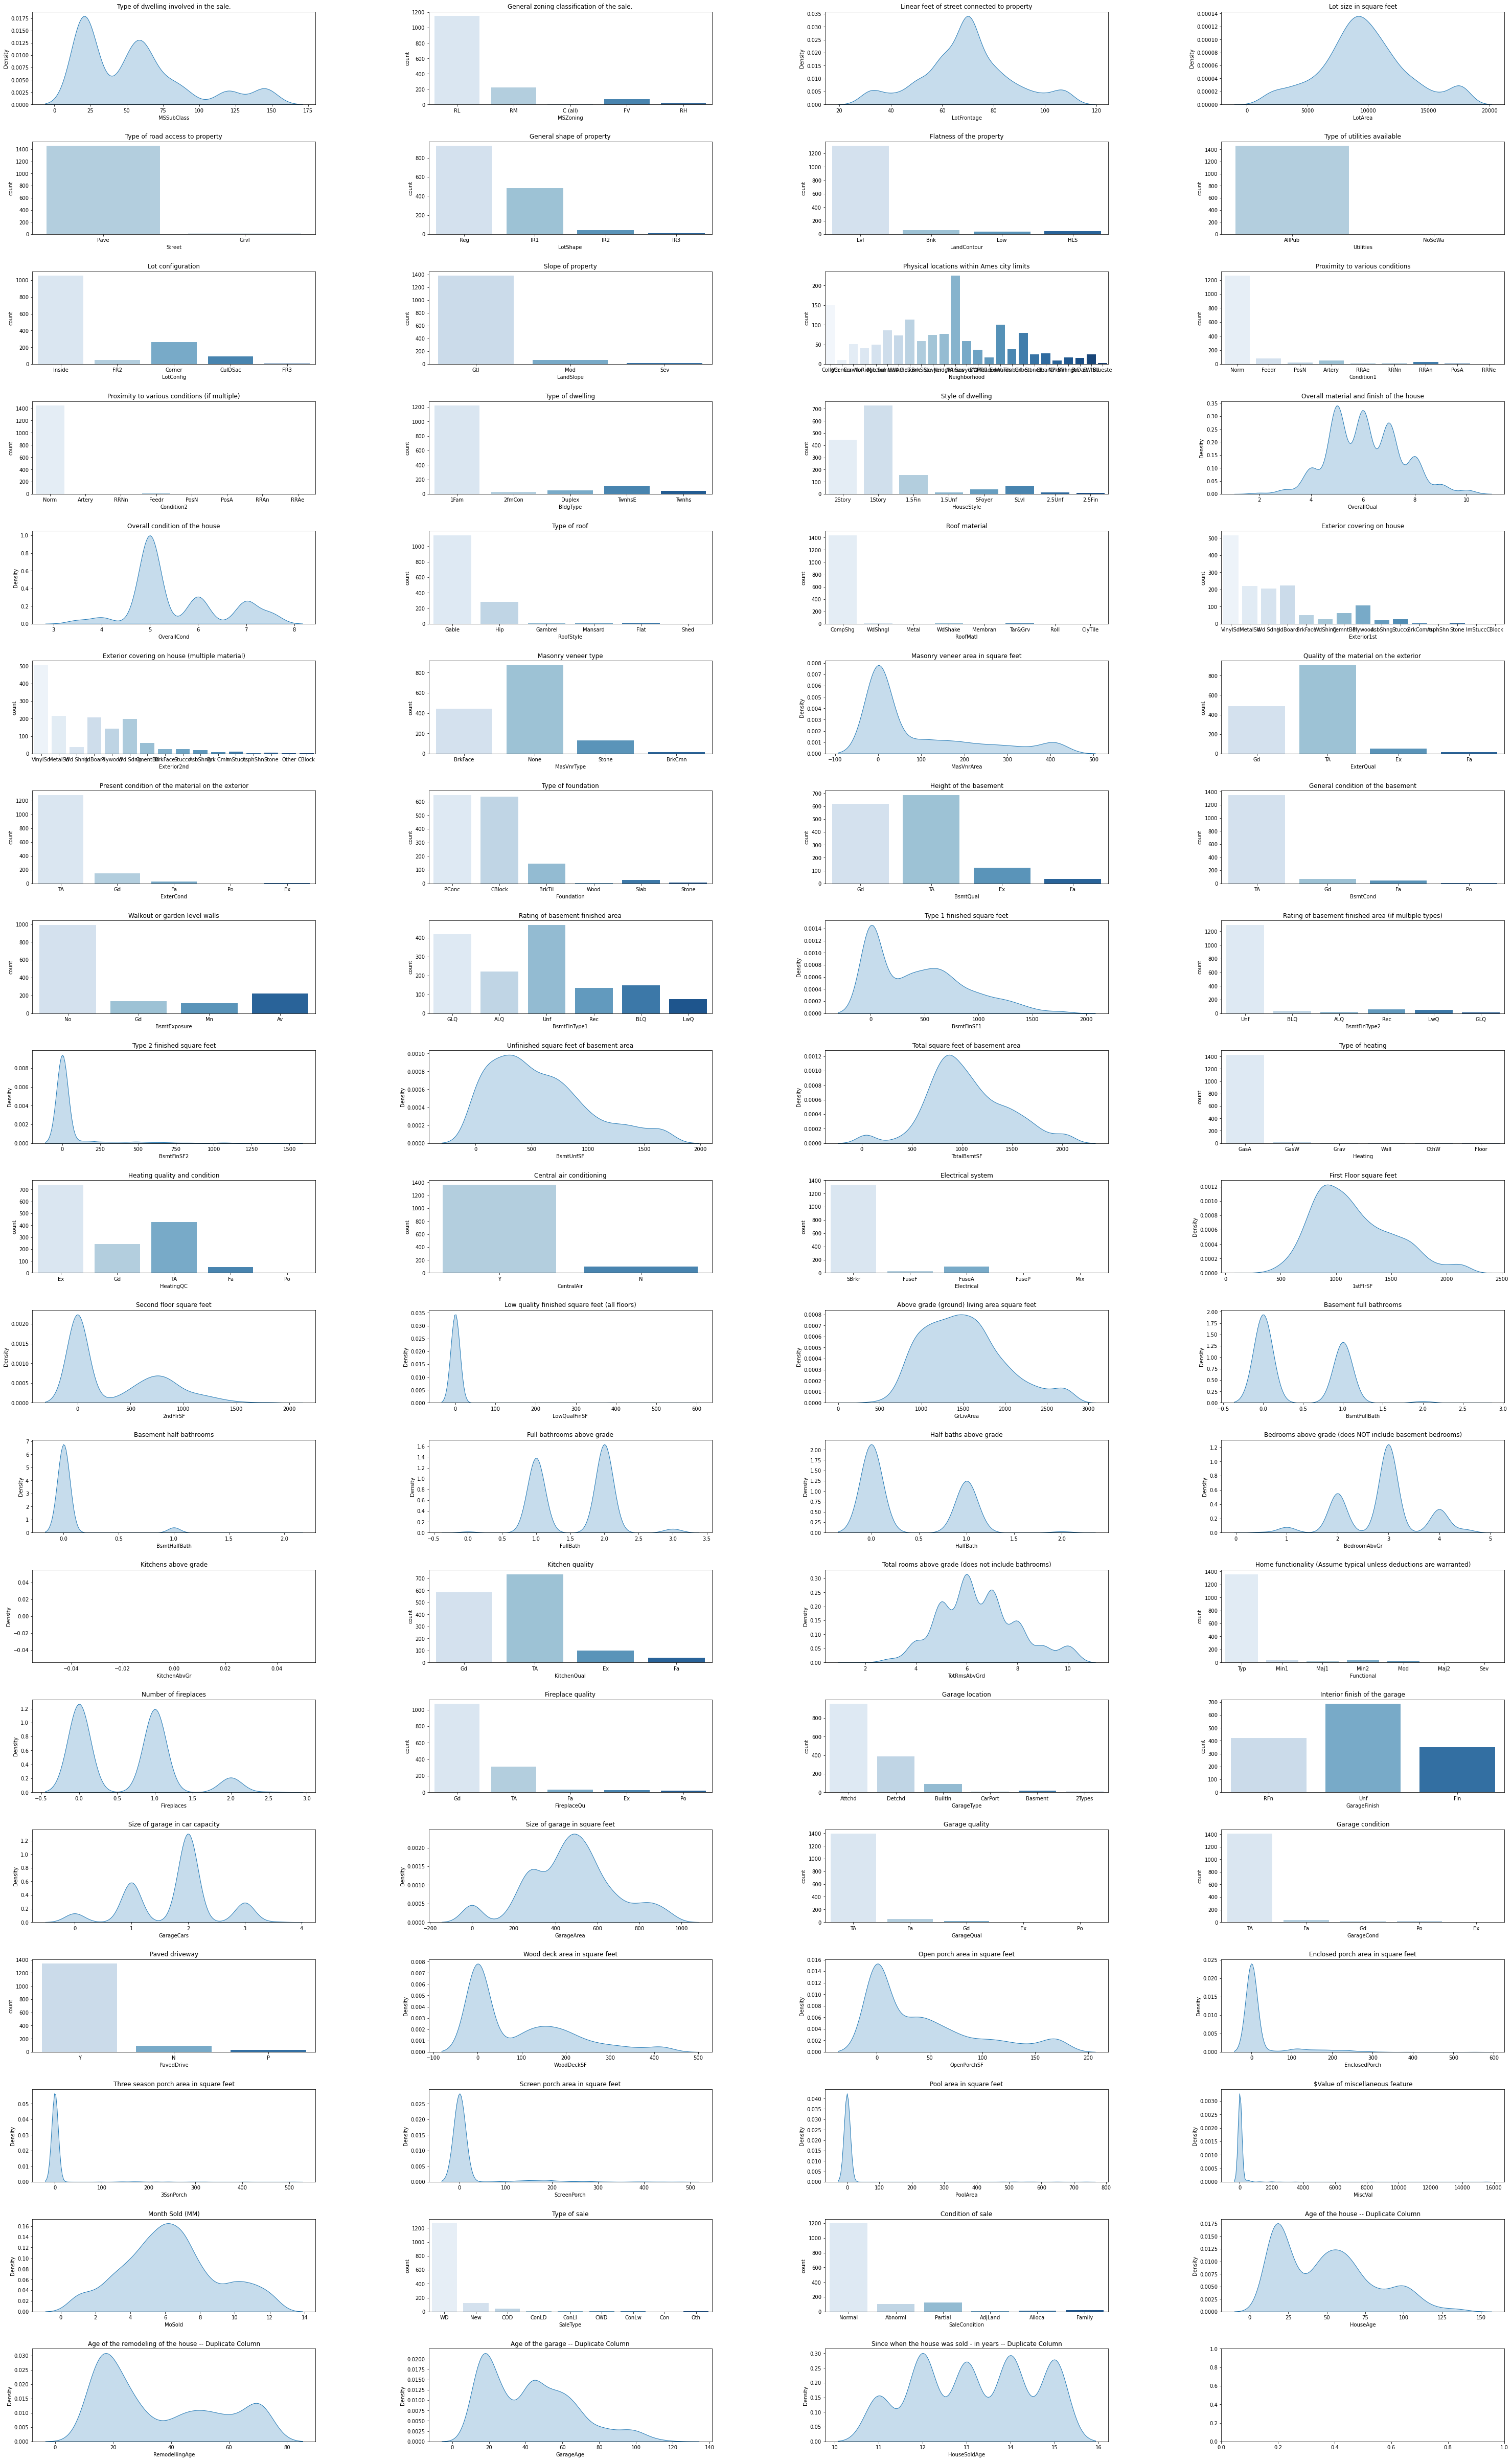

In [20]:
# As there are total 75 features, we will arrange them in 19 rows and 4 columns
univariate_analysis(df,column_data,row_count=19,col_count=4)

Insights from univariate analysis:

* 'MSSubClass': 'Type of dwelling involved in the sale is mostly between 20-80 range which inclues the below values:
        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        
* 'MSZoning':'RL (Residential Low Density) is the maximum occuring value for General zoning classification of the sale' followed by 'RM' (Residential Medium Density)

* 'LotFrontage':'Linear feet of street connected to property mostly ranges between 65 to 75 feets'

* 'LotArea':'Lot size in square feet ranges between 3000 to 20000 range'

* 'Street':'Type of road access to property is mostly PAVED. Instances of GRAVEL roads are almost negligible'

* 'LotShape':'General shape of property is mostly REGULAR followed by Slighly irregular. There are very less instances of property with moderately irregular shape and the count of highly irregular property is almost negligible'

* 'LandContour':'Flatness of the property is almost Near Flat/Level. Instances of BANKED/HILLSIDE/DEPRESSION levels are almost equal with each other but very very less in number'

* 'Utilities':'Type of utilities available is All public Utilities (E,G,W,& S). Looks like all the properties are equipped with all these utilities'

* 'LotConfig':'Lot configuration is mostly INSIDE LOT followed by CORNER LOT. Next comes Cul-de-sac followed by very very low count of Frontage on 2 sides of property & almost negligible Frontage on 3 sides of property'

* 'LandSlope':'Slope of property is mostly GENTLE SLOPE. Very very less instances of MODERATE SLOPE and almost negligible instances of SEVERE SLOPE'

* 'Neighborhood':'Physical locations within Ames city limits' - ?????? UNCLEAR IN DIAGRAM

* 'Condition1':'Proximity to various conditions is mostly NORMAL with very less instances of ADJACENT TO ARTERIAL STREET and ADJACENT TO FEEDER STREET'

* 'Condition1':'Proximity to various conditions (if multiple) is almost NORMAL with a negligible instances of ADJACENT TO FEEDER STREET'

* 'BldgType':'Type of dwelling is mostly SINGLE-FAMILY-DETACHED and followed by less instances of TOWNHOUSE-END-UNIT. There are equal instances of TOWNHOUSE-INSIDE-UNIT and DUPLEX type'

* 'HouseStyle':'Style of dwelling is mostly 1-STOREY followed by 2-STOREY and then 1.5-STOREY WITH SECOND LEVEL FINISHED. Less instances of SPLIT-LEVEL'

* 'OverallQual':'Overall material and finish of the house mostly ranges from AVERAGE to GOOD'
       5	Average
       6	Above Average
       7	Good

* 'OverallCond':'Overall condition of the house is mostly AVERAGE'

* 'RoofStyle':'Type of roof is mostly GABBLE followed by HIP. Instances of GABREL(BARN), MANSHARD & FLAT is very negligible'

* 'RoofMatl':'Roof material is almost STANDARD (COMPOSITE) SHINGLE. Very very negligible instances of GRAVEL&TAR'

* 'Exterior1st':'Exterior covering on house is majorly VINYL SIDING. METAL SIDING,WOOD SIDING & HARD BOARD SIDING are almost equal in number. Then comes PLYWOOD and followed by CEMENT BOARD'

* 'Exterior2nd':'Exterior covering on house (multiple material) is almost same as Exterior1st feature. Only a slight increase in the number of PLYWOOD coverings'

* 'MasVnrType':'Masonry veneer type is mostly None followed by BRICKFACE. Very less number of STONE and almost neglible counts of BRICK-COMMON'

* 'MasVnrArea':'Masonry veneer area in square feet' --- ??? Check in detail

* 'ExterQual':'Quality of the material on the exterior is mostly AVERAGE/TYPICAL followed by GOOD condition. Very less instances of EXCELLENT and almost negligible instances of FAIR condition'

* 'ExterCond':'Present condition of the material on the exterior is mostly AVERAGE/TYPICAL followed by very less GOOD condition. Very very less instances of FAIR and almost negligible instances of EXCELLENT condition'

* 'Foundation':'Type of foundation is mostly POURED-CONCRETE & CINDER-BLOCK (both equal in number) followed by less instances of BRICK-&-TILE. Very less instances of SLAB and almost negligible instances of WOOD and STONE'

* 'BsmtQual':'Height of the basement is mainly TYPICAL (80-89 inches) followed by GOOD (90-99 inches). Very less instances of EXCELLENT (100+ inches) and almost negligible instances of FAIR (70-79 inches)'

* 'BsmtCond':'General condition of the basement is mostly TYPICAL(slight dampness allowed) followed by more or less equal instances of GOOD and FAIR(dampness or some cracking or settling). Almost negligible instances of POOR(Severe cracking, settling, or wetness)'

* 'BsmtExposure':'Walkout or garden level walls is mostly NO-EXPOSURE followed by lesser instances of AVERAGE(split levels or foyers typically score average or above). This is followed by little lesser but equal occurences of GOOD and MINIMUM exposure'

* 'BsmtFinType1':'Rating of basement finished area is mostly UNFINISHED followed by GOOD-LIVING-QUARTERS. This is followed by AVERAGE-LIVING-QUARTERS and followed by lesser but equal occurences of AVERAGE-REC-ROOM and BELOW-AVERAGE-LIVING-QUARTERS. The least is of LOW-QUALITY'

* 'BsmtFinSF1':'Type 1 finished square feet' -- ?? NOT ABLE TO UNDERSTAND

* 'BsmtFinType2':'Rating of basement finished area (if multiple types) is mostly UNFINISHED. Very lesser instances of AVERAGE-REC-ROOM & LOW-QUALITY'

* 'BsmtFinSF2':'Type 2 finished square feet' --?? NOT ABLE TO UNDERSTAND

* 'BsmtUnfSF':'Unfinished square feet of basement area' --?? NOT ABLE TO UNDERSTAND

* 'TotalBsmtSF':'Total square feet of basement area has a mean value of close to 1000 sqft'

* 'Heating':'Type of heating is mostly GAS-FORCED-WARM-AIR-FURNACE while almost zero occurences of GAS-HOT-WATER-OR-STEAM-HEAT',

* 'HeatingQC':'Heating quality and condition is mainly EXCELLENT followed by lesser instances of AVERAGE/TYPICAL. Followed by GOOD and very lesser instances of FAIR' 

* 'CentralAir':'Central air conditioning is mostly present(YES) while very lesser instances of absent(NO)'

* 'Electrical':'Electrical system is majorly STANDARD-CIRCUIT-BREAKER-AND-ROMEX. Very lesser instances of FUSE-BOX-OVER-60-AMP-AND-ALL-ROMEX-WIRING (Average) and almost zero occurences of 60-AMP-FUSE-BOX-AND-MOSTLY-ROMEX-WIRING(Fair)'

* '1stFlrSF':'First Floor square feet is mostly having a mean around 1000 sqft'

* '2ndFlrSF':'Second floor square feet' --? NOT ABLE TO UNDERSTAND

* 'LowQualFinSF':'Low quality finished square feet (all floors) -- ?? NOT ABLE TO UNDERSTAND

* 'GrLivArea':'Above grade (ground) living area square feet is mostly between 1000 - 2000 sqft'

* 'BsmtFullBath':'Basement full bathrooms are mostly 0 followed by slightly lesser occurences of 1 but almost zero occurences of 2'

* 'BsmtHalfBath':'Basement half bathrooms are mostly 0 and very very lesser occurences of 1 bathroom'

* 'FullBath':'Full bathrooms above grade are mostly 2 followed by slightly lesser occurences of 1 but almost zero occurences of 3'

* 'HalfBath':'Half baths above grade are mostly 0 followed by lesser instances of 1 but almost zero occurences of 1'

* 'BedroomAbvGr':'Bedrooms above grade (does NOT include basement bedrooms) are mostly 3 followed by slightly lesser instances of 2 followed by lesser instances of 4. Very very lesser instances of 1,5 and 6'

* 'KitchenAbvGr':'Kitchens above grade is majorly 1 and close to zero instances of 2'

* 'KitchenQual':'Kitchen quality is mostly TYPICAL/AVERAGE followed by slightly lesser instances of GOOD. Very lesser instances of EXCELLENT and least occurences of FAIR'

* 'TotRmsAbvGrd':'Total rooms above grade (does not include bathrooms) typically varies in the range of 4 to 8'

* 'Functional':'Home functionality (Assume typical unless deductions are warranted) is mojorly TYPICAL. Very very lesser instances of MINOR-1 & MINOR-2 deductions. Almost zero occurences of MAJOR-DEDUCTIONS and MODERATE-DEDUCTIONS'

* 'Fireplaces':'Number of fireplaces are mostly 0 to 1 while very lesser occurences of 2'

* 'FireplaceQu':'Fireplace quality is mostly GOOD(Masonry Fireplace in main level) followed by lesser instances of AVERAGE(Prefabricated Fireplace in main living area or Masonry Fireplace in basement). Very very lesser but equal occurences of FAIR(Prefabricated Fireplace in basement), EXCELLENT(Exceptional Masonry Fireplace) and POOR(Ben Franklin Stove)'

* 'GarageType':'Garage location is majorly ATTACHED (Attached to home) followed by lesser instances of DETACHED(Detached from home) and followed by again lesser instances of BUILTIN(Garage part of house - typically has room above garage)'

* 'GarageFinish':'Interior finish of the garage is mostly UNFINISHED followed by lesser but equal instances of ROUGH-FINISHED and FINISHED'

* 'GarageCars':'Size of garage in car capacity can accomodate mostly 2 cars followed by lesser instances of 1 followed by lesser instances of 3 cars. Very very lesser instances of 0 car'

* 'GarageArea':'Size of garage in square feet mostly varies between 250 - 600 sqft'

* 'GarageQual':'Garage quality is majorly TYPICAL/AVERAGE followed by very very lesser instances of FAIR and close to zero instances of GOOD'

* 'GarageCond':'Garage condition is majorly TYPICAL/AVERAGE. Very very less instances of FAIR'

* 'PavedDrive':'Paved driveway is mostly PAVED followed by very very lesser instances of DIRT/GRAVEL. Close to zero occurences of PARTIAL-PAVEMENT'

* 'WoodDeckSF':'Wood deck area in square feet' -- ?? DID NOT UNDERSTAND

* 'OpenPorchSF':'Open porch area in square feet' -- ?? DID NOT UNDERSTAND

* 'EnclosedPorch':'Enclosed porch area in square feet' -- ?? DID NOT UNDERSTAND

* '3SsnPorch':'Three season porch area in square feet' -- ?? DID NOT UNDERSTAND

* 'ScreenPorch':'Screen porch area in square feet'-- ?? DID NOT UNDERSTAND

* 'PoolArea':'Pool area in square feet'-- ?? DID NOT UNDERSTAND

* 'MiscVal':'Dollar Value of miscellaneous feature' -- ?? DID NOT UNDERSTAND

* 'MoSold':'Month Sold (MM) varies typically between 4-8'

* 'SaleType':'Type of sale is mostly WD(Warranty Deed - Conventional) followed by very lesser instances of NEW(Home just constructed and sold). Very very lesser instance of COD(Court Officer Deed/Estate)'

* 'SaleCondition':'Condition of sale is mostly NORMAL followed by lesser but equal number of ABNORMAL(Abnormal Sale -  trade, foreclosure, short sale) & PARTIAL(Home was not completed when last assessed (associated with New Homes)). Close to zero instances of other types'

* 'HouseAge':'Age of the house', --- CHECK IN BOXPLOT

* 'RemodellingAge':'Age of the remodeling of the house' --- CHECK IN BOXPLOT

* 'GarageAge':'Age of the garage' --- CHECK IN BOXPLOT

* 'HouseSoldAge':'Since when the house was sold - in years' --- CHECK IN BOXPLOT

<AxesSubplot:xlabel='HouseAge'>

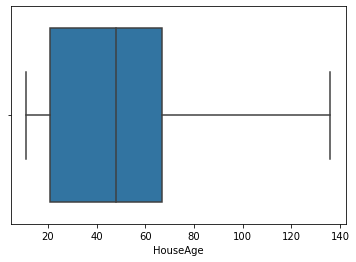

In [21]:
sns.boxplot(x='HouseAge',data=df)
## The average age of the house is 45 years old however 75% of the houses are in the range of 0-65 years of age.

<AxesSubplot:xlabel='RemodellingAge'>

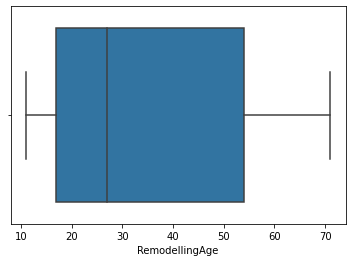

In [22]:
sns.boxplot(x='RemodellingAge',data=df)
## The average age of the remodelling is 27 years however 75% of the houses are in the range of 0-54 years of age.

<AxesSubplot:xlabel='GarageAge'>

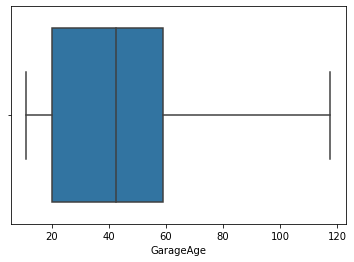

In [23]:
sns.boxplot(x='GarageAge',data=df)
## The average age of the garage is 42 years however 75% of the garages are in the range of 0-60 years of age.

<AxesSubplot:xlabel='HouseSoldAge'>

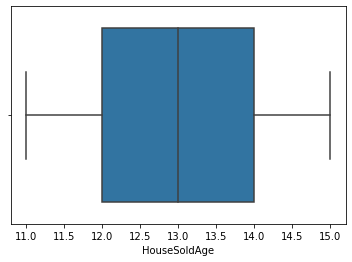

In [24]:
sns.boxplot(x='HouseSoldAge',data=df)
## 50% of the houses are sold in last 13 years however 75% of the houses are sold in last 14 years

# Bi-variate analysis


### We need to convert the categorical features to numeric before starting the bi-variate analysis

In [25]:
# Check the count of CATEGORICAL features and NUMERICAL features
df.dtypes.value_counts()

object     39
float64    24
int64      14
dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder

#cat_features = [col_name for col_name in df.columns if df[col_name].dtype == 'object']
cat_features = df.select_dtypes(include=['object','bool']).columns

print(cat_features)

if len(cat_features) > 0:
    print('Converting categorical features to Label-encoding  - START')
    for feature in cat_features:
        encoder = LabelEncoder()
        df[feature] = encoder.fit_transform(df[feature])
    print('Converting categorical features to Label-encoding  - END')
else:
    print('No categorical features found. Skipping the conversion step.')


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Converting categorical features to Label-encoding  - START
Converting categorical features to Label-encoding  - END


In [27]:
df.MSZoning.value_counts()

3    1151
4     218
1      65
2      16
0      10
Name: MSZoning, dtype: int64

In [28]:
# Find the correlation of input features w.r.t. output
corr_data = df.corr()['SalePrice']

# SalePrice is not required as this is the output feature
corr_data.pop('SalePrice')

1.0

In [29]:
# Convert this correlation data into a dataframe
corr_df = corr_data.to_frame()

<AxesSubplot:xlabel='Feature', ylabel='Correlation'>

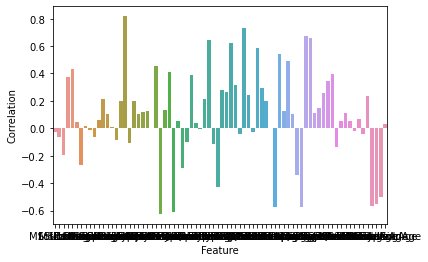

In [30]:
# Convert the index to column
corr_df.reset_index(inplace=True)
corr_df.columns = ['Feature','Correlation']
sns.barplot(x='Feature',y='Correlation',data=corr_df)

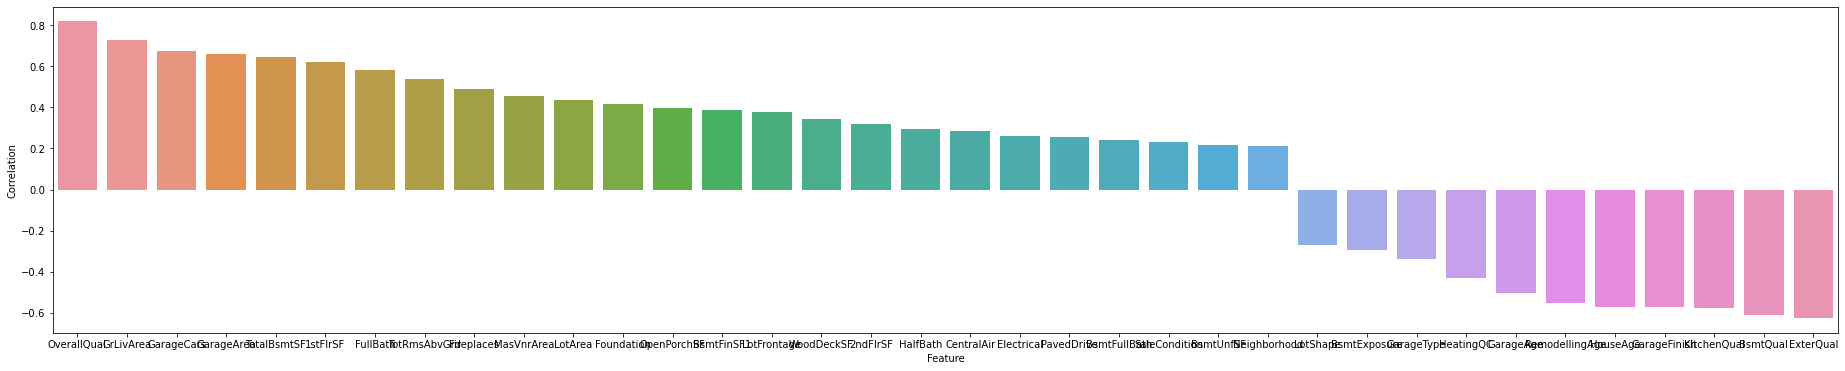

In [31]:
# AS THERE ARE SO MANY FEATURES, WE NEED TO RESTRICT THESE BY USING A CUTOFF ON CORRELATION VALUE

# Find the features having either > 0.3 OR > -0.3 correlation value
# Also sort the dataframe based on correlation values
corr_df = corr_df[np.absolute(corr_df.Correlation)>=0.2]
corr_df.sort_values(by='Correlation',ascending=False,inplace=True)


plt.figure(figsize=(32,6))
sns.barplot(x='Feature',y='Correlation',data=corr_df)
plt.savefig('statistics/correlation.jpg')

# Dataset Preparation for model

In [32]:
selected_features = corr_df.Feature.values
selected_features

array(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'MasVnrArea', 'LotArea', 'Foundation', 'OpenPorchSF',
       'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'HalfBath',
       'CentralAir', 'Electrical', 'PavedDrive', 'BsmtFullBath',
       'SaleCondition', 'BsmtUnfSF', 'Neighborhood', 'LotShape',
       'BsmtExposure', 'GarageType', 'HeatingQC', 'GarageAge',
       'RemodellingAge', 'HouseAge', 'GarageFinish', 'KitchenQual',
       'BsmtQual', 'ExterQual'], dtype=object)

In [33]:
#X = df.copy().drop(['SalePrice'],axis=1)
X = df[selected_features]
Y = df.SalePrice

In [34]:
X.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,MasVnrArea,...,BsmtExposure,GarageType,HeatingQC,GarageAge,RemodellingAge,HouseAge,GarageFinish,KitchenQual,BsmtQual,ExterQual
0,7.0,1710.0,2.0,548.0,856.0,856.0,2,8.0,0.0,196.0,...,3,1,0,18.0,18,18.0,1,2,2,2
1,6.0,1262.0,2.0,460.0,1262.0,1262.0,2,6.0,1.0,0.0,...,1,1,0,45.0,45,45.0,1,3,2,3
2,7.0,1786.0,2.0,608.0,920.0,920.0,2,6.0,1.0,162.0,...,2,1,0,20.0,19,20.0,1,2,2,2
3,7.0,1717.0,3.0,642.0,756.0,961.0,1,7.0,1.0,0.0,...,3,5,2,23.0,51,106.0,2,2,3,3
4,8.0,2198.0,3.0,836.0,1145.0,1145.0,2,9.0,1.0,350.0,...,0,1,0,21.0,21,21.0,1,2,2,2


In [35]:
from sklearn.model_selection import train_test_split
train_X,test_X, train_Y, test_Y = train_test_split(X,Y,test_size=0.3,random_state=23)

# Scaling of the data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
train_X = std_scaler.fit_transform(train_X)
test_X = std_scaler.fit_transform(test_X)

print(f'Train set size --> Train-X : {train_X.shape} and Train-Y : {train_Y.shape}')
print(f'Test set size --> Test-X : {test_X.shape} and Test-Y : {test_Y.shape}')

Train set size --> Train-X : (1022, 36) and Train-Y : (1022,)
Test set size --> Test-X : (438, 36) and Test-Y : (438,)



# Models

## 1. Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Model score : 0.8773482515360213
R2 score : 0.8964023732864528


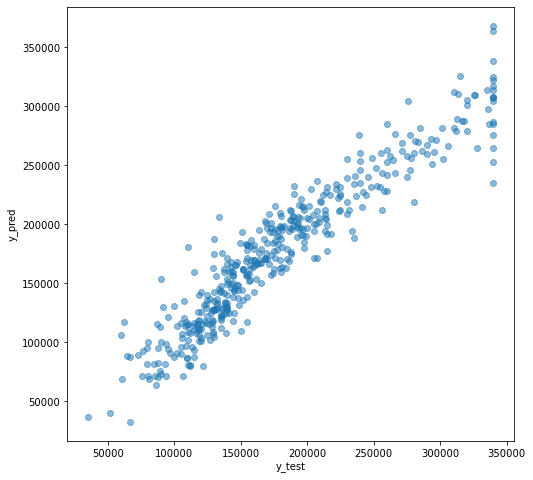

In [37]:
model.fit(train_X,train_Y)
predictions = model.predict(test_X)
print(f'Model score : {model.score(train_X, train_Y)}')

from sklearn import metrics
print(f'R2 score : {metrics.r2_score(test_Y, predictions)}')


# 2. Plot the scatter plot
plt.figure(figsize = (8,8))
plt.scatter(test_Y, predictions, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 2. RandomForestRegressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

Model score : 0.9816456576247193
R2 score : 0.8993555236348516


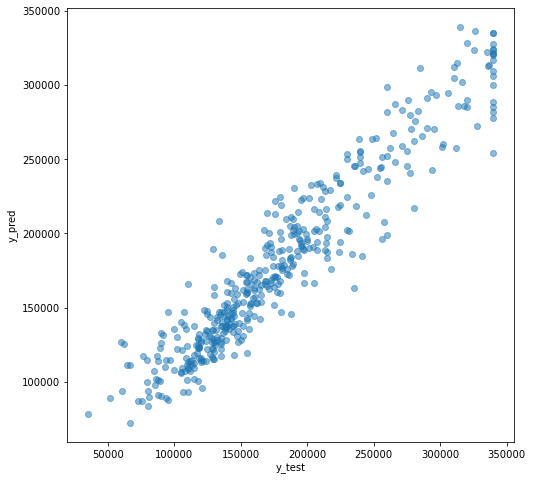

In [39]:
model.fit(train_X,train_Y)
predictions = model.predict(test_X)
print(f'Model score : {model.score(train_X, train_Y)}')

from sklearn import metrics
print(f'R2 score : {metrics.r2_score(test_Y, predictions)}')


# 2. Plot the scatter plot
plt.figure(figsize = (8,8))
plt.scatter(test_Y, predictions, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 3. GradientBoostingRegressor

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

Model score : 0.9578047098349987
R2 score : 0.9092735962503479


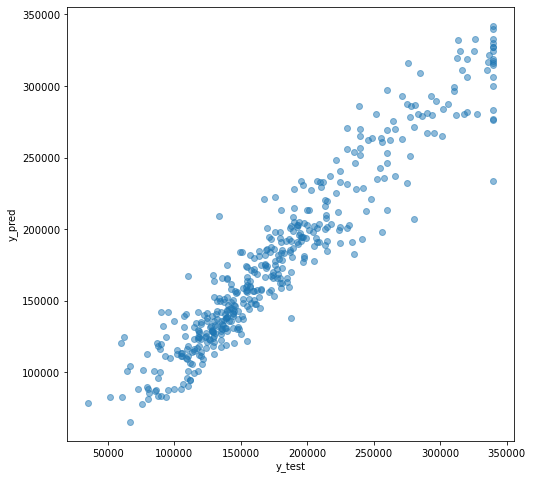

In [41]:
model.fit(train_X,train_Y)
predictions = model.predict(test_X)
print(f'Model score : {model.score(train_X, train_Y)}')

from sklearn import metrics
print(f'R2 score : {metrics.r2_score(test_Y, predictions)}')


# 2. Plot the scatter plot
plt.figure(figsize = (8,8))
plt.scatter(test_Y, predictions, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 4. XGBoost Regressor

In [42]:
import xgboost
classi = xgboost.XGBRegressor(colsample_bytree=0.5, subsample = 0.5, 
                               max_depth=4, min_child_weight=3.5, 
                               eta = 0.05, n_estimators=2000,
                               reg_alpha=0.5, reg_lambda=0.8, 
                               gamma=0.05)

Model score : 0.9578047098349987
R2 score : 0.9091462906494671


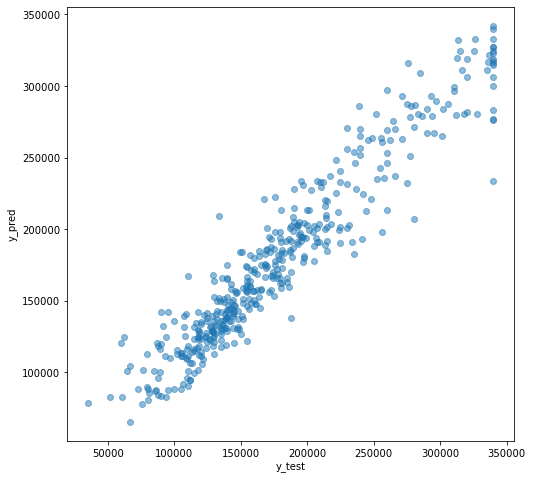

In [43]:
model.fit(train_X,train_Y)
predictions = model.predict(test_X)
print(f'Model score : {model.score(train_X, train_Y)}')

from sklearn import metrics
print(f'R2 score : {metrics.r2_score(test_Y, predictions)}')


# 2. Plot the scatter plot
plt.figure(figsize = (8,8))
plt.scatter(test_Y, predictions, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 5. CatBoost Regressor

In [44]:
#!pip install catboost

from catboost import CatBoostRegressor
model = CatBoostRegressor(verbose=0,loss_function='RMSE')

Model score : 0.9948685331135719
R2 score : 0.9204853030395473


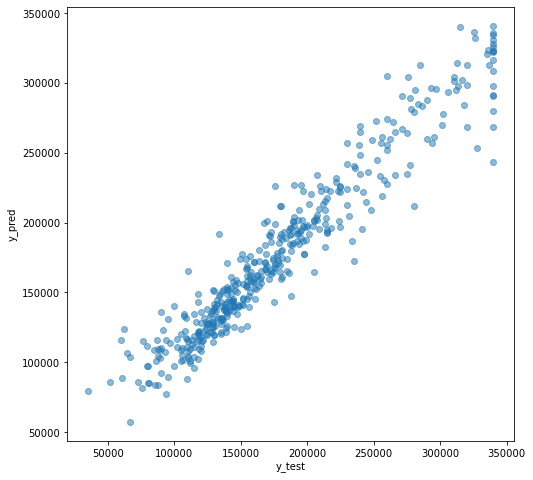

In [45]:
model.fit(train_X,train_Y)
predictions = model.predict(test_X)
print(f'Model score : {model.score(train_X, train_Y)}')

from sklearn import metrics
print(f'R2 score : {metrics.r2_score(test_Y, predictions)}')


# 2. Plot the scatter plot
plt.figure(figsize = (8,8))
plt.scatter(test_Y, predictions, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Before Outlier removal

#### We can see that the best model till now is 'CatBoostRegressor' with the below metrics: 

* Model score : 0.9944806777730163
* R2 score : 0.8972630606539352

## After Outlier removal

#### We can see that the best model till now is 'CatBoostRegressor' with the below metrics: 

* Model score : 0.9948685331135719
* R2 score : 0.9204853030395473



## Hyper-parameter tuning -- TO BE RELOOKED

In [65]:

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import catboost as cb

model = cb.CatBoostRegressor(loss_function='RMSE',od_type='Iter',od_wait=10)

# Combine the X and Y into one dataset
train_dataset = cb.Pool(train_X,train_Y)
test_dataset = cb.Pool(test_X,test_Y)

'''param_catboost = [
    {
        'learning_rate': [0.001,0.03],        
        'depth': [2, 4, 6, 8,16],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]
    }
]

print('\n ---- MODEL OPTIMIZATION USING GRID SEARCH ----')
model.grid_search(param_catboost, train_dataset,cv=5,plot=True)

'''
model.fit(train_X,train_Y)
#optimized_accuracy = optimized_model.best_score_ * 100
#best_params = optimized_model.best_params_
#print(f'Best accuracy after optimization : {optimized_accuracy}%')
#print(f'Best parameters after optimization : {best_params}%')

Learning rate set to 0.039182
0:	learn: 64839.6711891	total: 3.29ms	remaining: 3.28s
1:	learn: 63008.3278206	total: 5.98ms	remaining: 2.98s
2:	learn: 61397.8968490	total: 9.66ms	remaining: 3.21s
3:	learn: 59923.0649992	total: 12.1ms	remaining: 3.01s
4:	learn: 58431.6578860	total: 15.2ms	remaining: 3.03s
5:	learn: 57030.4864862	total: 18.1ms	remaining: 3s
6:	learn: 55558.0157656	total: 20.4ms	remaining: 2.89s
7:	learn: 54074.1627517	total: 24.3ms	remaining: 3.01s
8:	learn: 52801.4231990	total: 27ms	remaining: 2.97s
9:	learn: 51525.4809697	total: 30.2ms	remaining: 2.99s
10:	learn: 50308.3491002	total: 33.2ms	remaining: 2.98s
11:	learn: 49195.8345876	total: 37.1ms	remaining: 3.05s
12:	learn: 48094.2431784	total: 40.3ms	remaining: 3.06s
13:	learn: 47037.9469064	total: 42.6ms	remaining: 3s
14:	learn: 45931.2619409	total: 46.2ms	remaining: 3.04s
15:	learn: 44969.0836152	total: 48.8ms	remaining: 3s
16:	learn: 43997.9537634	total: 52ms	remaining: 3s
17:	learn: 43114.6959712	total: 55.4ms	remai

161:	learn: 16138.4508930	total: 554ms	remaining: 2.87s
162:	learn: 16107.9499347	total: 559ms	remaining: 2.87s
163:	learn: 16066.7071048	total: 563ms	remaining: 2.87s
164:	learn: 16025.2011374	total: 566ms	remaining: 2.87s
165:	learn: 15999.3969612	total: 569ms	remaining: 2.86s
166:	learn: 15962.0417645	total: 572ms	remaining: 2.85s
167:	learn: 15933.2468804	total: 576ms	remaining: 2.85s
168:	learn: 15888.1774377	total: 579ms	remaining: 2.85s
169:	learn: 15858.5784543	total: 582ms	remaining: 2.84s
170:	learn: 15818.8265726	total: 585ms	remaining: 2.83s
171:	learn: 15783.2088916	total: 587ms	remaining: 2.83s
172:	learn: 15745.9388803	total: 591ms	remaining: 2.82s
173:	learn: 15722.4040963	total: 593ms	remaining: 2.82s
174:	learn: 15691.5901135	total: 596ms	remaining: 2.81s
175:	learn: 15664.2407473	total: 600ms	remaining: 2.81s
176:	learn: 15634.2530070	total: 603ms	remaining: 2.8s
177:	learn: 15599.0623608	total: 607ms	remaining: 2.8s
178:	learn: 15563.6459942	total: 610ms	remaining: 

339:	learn: 11479.5625169	total: 1.12s	remaining: 2.17s
340:	learn: 11461.2330380	total: 1.12s	remaining: 2.17s
341:	learn: 11442.0413672	total: 1.13s	remaining: 2.17s
342:	learn: 11423.1944190	total: 1.13s	remaining: 2.16s
343:	learn: 11413.9432607	total: 1.13s	remaining: 2.16s
344:	learn: 11389.4804406	total: 1.14s	remaining: 2.15s
345:	learn: 11375.7340207	total: 1.14s	remaining: 2.15s
346:	learn: 11356.9495480	total: 1.14s	remaining: 2.15s
347:	learn: 11348.4191830	total: 1.14s	remaining: 2.14s
348:	learn: 11333.6622050	total: 1.15s	remaining: 2.14s
349:	learn: 11316.3084674	total: 1.15s	remaining: 2.14s
350:	learn: 11299.2193865	total: 1.15s	remaining: 2.13s
351:	learn: 11271.2286045	total: 1.16s	remaining: 2.13s
352:	learn: 11254.6882625	total: 1.16s	remaining: 2.13s
353:	learn: 11248.4748019	total: 1.17s	remaining: 2.13s
354:	learn: 11224.5689578	total: 1.17s	remaining: 2.12s
355:	learn: 11210.4781759	total: 1.17s	remaining: 2.12s
356:	learn: 11189.6747167	total: 1.17s	remaining

490:	learn: 9288.8299212	total: 1.69s	remaining: 1.75s
491:	learn: 9278.1456224	total: 1.69s	remaining: 1.74s
492:	learn: 9269.2752827	total: 1.69s	remaining: 1.74s
493:	learn: 9258.2208267	total: 1.7s	remaining: 1.74s
494:	learn: 9246.5487897	total: 1.7s	remaining: 1.73s
495:	learn: 9236.3117129	total: 1.7s	remaining: 1.73s
496:	learn: 9222.5288654	total: 1.71s	remaining: 1.73s
497:	learn: 9210.7275441	total: 1.71s	remaining: 1.72s
498:	learn: 9194.5210959	total: 1.71s	remaining: 1.72s
499:	learn: 9181.1346106	total: 1.72s	remaining: 1.72s
500:	learn: 9173.7160944	total: 1.72s	remaining: 1.71s
501:	learn: 9164.9900870	total: 1.72s	remaining: 1.71s
502:	learn: 9146.6056311	total: 1.73s	remaining: 1.71s
503:	learn: 9139.4319314	total: 1.73s	remaining: 1.7s
504:	learn: 9133.1733174	total: 1.73s	remaining: 1.7s
505:	learn: 9115.9908237	total: 1.74s	remaining: 1.69s
506:	learn: 9104.3634323	total: 1.74s	remaining: 1.69s
507:	learn: 9099.0291954	total: 1.74s	remaining: 1.69s
508:	learn: 908

662:	learn: 7299.2311519	total: 2.25s	remaining: 1.15s
663:	learn: 7289.4215498	total: 2.26s	remaining: 1.14s
664:	learn: 7278.7408315	total: 2.26s	remaining: 1.14s
665:	learn: 7270.7796242	total: 2.26s	remaining: 1.14s
666:	learn: 7261.8745867	total: 2.27s	remaining: 1.13s
667:	learn: 7248.4036745	total: 2.27s	remaining: 1.13s
668:	learn: 7237.6207316	total: 2.27s	remaining: 1.13s
669:	learn: 7230.1713023	total: 2.28s	remaining: 1.12s
670:	learn: 7226.9179224	total: 2.28s	remaining: 1.12s
671:	learn: 7213.4923426	total: 2.29s	remaining: 1.12s
672:	learn: 7205.7321142	total: 2.29s	remaining: 1.11s
673:	learn: 7195.9301188	total: 2.29s	remaining: 1.11s
674:	learn: 7184.2706298	total: 2.3s	remaining: 1.11s
675:	learn: 7176.4905718	total: 2.3s	remaining: 1.1s
676:	learn: 7166.3481376	total: 2.31s	remaining: 1.1s
677:	learn: 7149.7827133	total: 2.31s	remaining: 1.1s
678:	learn: 7137.3250230	total: 2.31s	remaining: 1.09s
679:	learn: 7124.3651723	total: 2.32s	remaining: 1.09s
680:	learn: 711

850:	learn: 5711.1292417	total: 3.02s	remaining: 529ms
851:	learn: 5703.7600330	total: 3.02s	remaining: 525ms
852:	learn: 5695.6132414	total: 3.03s	remaining: 522ms
853:	learn: 5687.6687069	total: 3.03s	remaining: 518ms
854:	learn: 5681.7152164	total: 3.03s	remaining: 514ms
855:	learn: 5672.0798062	total: 3.04s	remaining: 511ms
856:	learn: 5663.1997687	total: 3.04s	remaining: 507ms
857:	learn: 5657.2570237	total: 3.04s	remaining: 504ms
858:	learn: 5648.9509567	total: 3.05s	remaining: 500ms
859:	learn: 5639.9220622	total: 3.05s	remaining: 497ms
860:	learn: 5633.0858789	total: 3.05s	remaining: 493ms
861:	learn: 5625.6337685	total: 3.06s	remaining: 490ms
862:	learn: 5616.0258923	total: 3.06s	remaining: 486ms
863:	learn: 5612.3317901	total: 3.07s	remaining: 483ms
864:	learn: 5602.8222302	total: 3.07s	remaining: 479ms
865:	learn: 5596.7601033	total: 3.07s	remaining: 476ms
866:	learn: 5590.7921851	total: 3.08s	remaining: 472ms
867:	learn: 5581.5005350	total: 3.08s	remaining: 468ms
868:	learn

Model score : 0.9948685331135719
R2 score : 0.9204853030395473


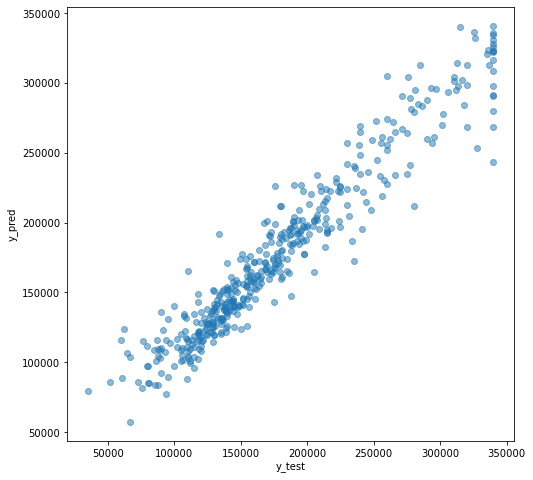

In [66]:
predictions = model.predict(test_X)
print(f'Model score : {model.score(train_X, train_Y)}')

from sklearn import metrics
print(f'R2 score : {metrics.r2_score(test_Y, predictions)}')


# 2. Plot the scatter plot
plt.figure(figsize = (8,8))
plt.scatter(test_Y, predictions, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Visual explanation of the role of features on the output

We will use SHAP values to identify the impact of feature values on the output

<AxesSubplot:>

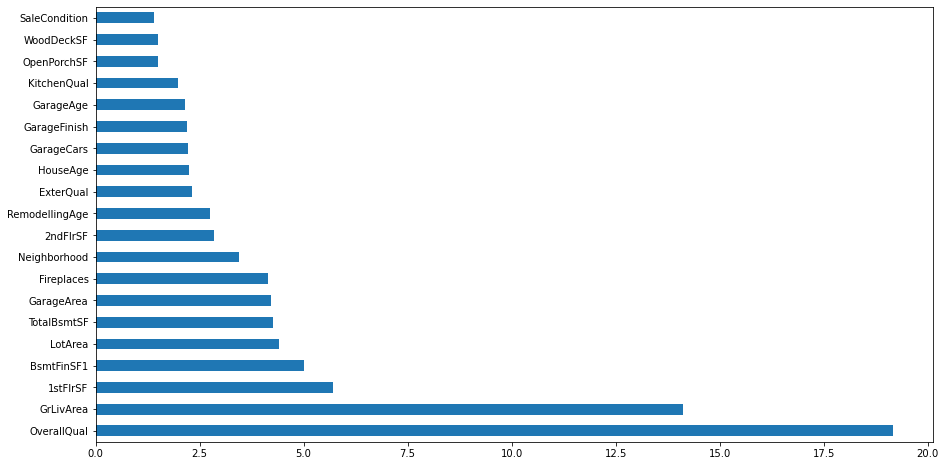

In [71]:
selected_features = X.columns

feature_importance = pd.Series(model.feature_importances_,index=selected_features)
plt.figure(figsize = (15,8))
feature_importance.nlargest(20).plot(kind='barh')

In [79]:
#!pip install shap
import shap

shap_explainer = shap.TreeExplainer(model)
shap_values = shap_explainer.shap_values(test_X)

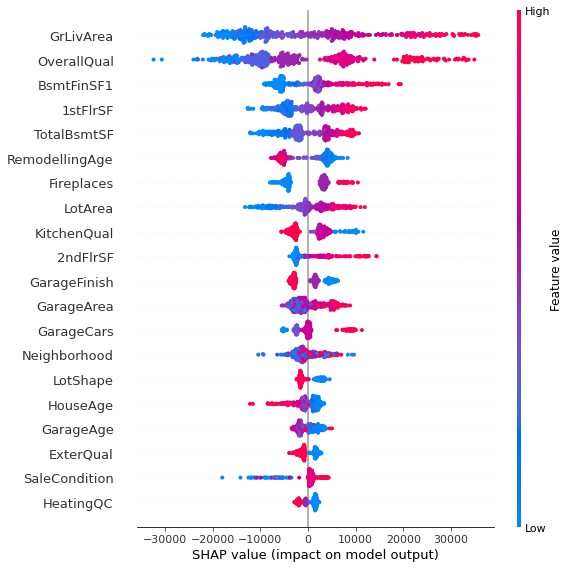

In [80]:
# plot the SHAP values
shap.summary_plot(shap_values,test_X,feature_names=selected_features)